# 1. Perform Text analysis based on Amazon reviews


In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud

df = pd.read_csv('/content/Product_Reviews.csv')
df.head()

,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title
0,5,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!"
1,5,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More
2,4,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader
3,5,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship
4,5,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT


sentiment_category
positive    1073
negative      70
neutral       34
Name: count, dtype: int64


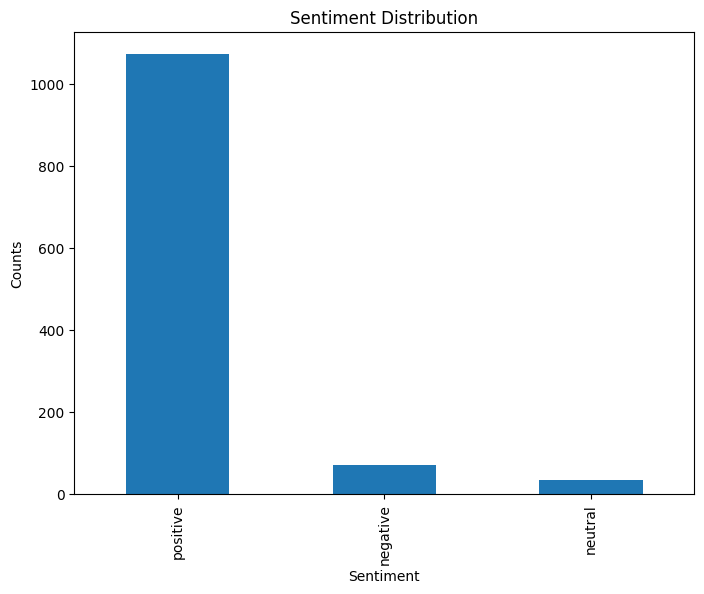

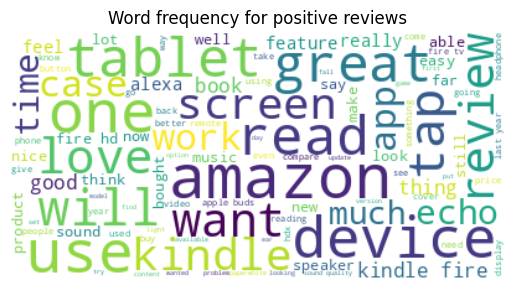

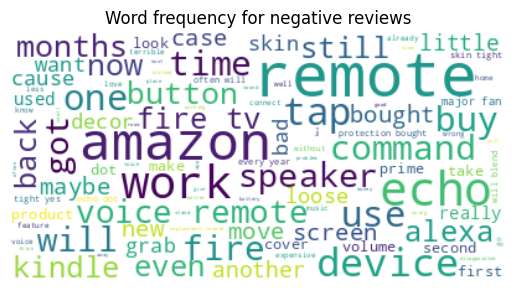

In [ ]:
# Simple text preprocessing
df['reviews.text'] = df['reviews.text'].astype(str)  # Ensure text is treated as string
df['reviews.text'] = df['reviews.text'].str.lower().str.replace("[^a-zA-Z]", " ")

# Function to calculate sentiment
def sentiment_analysis(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns the polarity

# Apply the function
df['sentiment'] = df['reviews.text'].apply(sentiment_analysis)
df['sentiment_category'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))
print(df['sentiment_category'].value_counts())

# Sentiment distribution
plt.figure(figsize=(8, 6))
df['sentiment_category'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()
print()

# Word Cloud for Positive Sentiments
positive_reviews = ' '.join(text for text in df[df['sentiment_category'] == 'positive']['reviews.text'])
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(positive_reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Word frequency for positive reviews')
plt.axis("off")
plt.show()
print()

# Word Cloud for Negative Sentiments
positive_reviews = ' '.join(text for text in df[df['sentiment_category'] == 'negative']['reviews.text'])
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(positive_reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Word frequency for negative reviews')
plt.axis("off")
plt.show()

# 2. Perform topic modeling on flipkart dataset


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

# Load data
data = pd.read_csv('/content/FlipkartDataset.csv')
texts = data['Summary']  # Update this to the column containing text data

# Text preprocessing setup
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(document):
    # Tokenize, remove stopwords and lemmatize
    tokens = tokenizer.tokenize(document.lower())
    processed_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and token.isalpha()]
    return processed_tokens

# Apply preprocessing to each document
texts = [preprocess_text(doc) for doc in texts]

In [ ]:
from gensim import corpora

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

# Convert dictionary to a Bag of Words corpus
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
from gensim.models import LdaModel

# Set training parameters
num_topics = 10
chunksize = 2000
passes = 20
iterations = 400
eval_every = None

# Make a index to word dictionary
temp = dictionary[0]  # This is only to "load" the dictionary
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

# Print the Keyword in the 10 topics
print(model.print_topics())

[(0, '0.096*"cooling" + 0.071*"ok" + 0.068*"speed" + 0.064*"product" + 0.062*"fan" + 0.052*"low" + 0.050*"superb" + 0.050*"dont" + 0.048*"like" + 0.043*"buy"'), (1, '0.098*"working" + 0.065*"day" + 0.061*"product" + 0.035*"month" + 0.034*"expected" + 0.031*"pump" + 0.031*"flipkart" + 0.027*"properly" + 0.027*"performance" + 0.025*"return"'), (2, '0.079*"cooler" + 0.060*"money" + 0.045*"value" + 0.038*"buy" + 0.037*"water" + 0.037*"air" + 0.034*"good" + 0.033*"product" + 0.029*"room" + 0.022*"worth"'), (3, '0.445*"nice" + 0.210*"product" + 0.067*"cooler" + 0.036*"cooling" + 0.035*"satisfied" + 0.028*"range" + 0.027*"price" + 0.025*"overall" + 0.020*"sound" + 0.017*"perfect"'), (4, '0.122*"product" + 0.095*"flipkart" + 0.087*"delivery" + 0.068*"awesome" + 0.042*"thanks" + 0.039*"cooler" + 0.036*"cooling" + 0.035*"time" + 0.031*"great" + 0.030*"good"'), (5, '0.057*"cool" + 0.049*"cooler" + 0.044*"go" + 0.035*"using" + 0.033*"room" + 0.027*"air" + 0.027*"cooling" + 0.027*"summer" + 0.024*"

In [ ]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.7 MB/s eta 0:00:00


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Prepare the visualization
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(model, corpus, dictionary)

# Display the visualization
pyLDAvis.display(vis)

# 3. Perform exploratory data analysis on covid dataset to visualize scatter and bar chart to display patient data



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('/content/covid_cleaned_data.csv')

# Display basic info and data types
print(data.info())

# Display the first few entries to understand what each column holds
print(data.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78120 entries, 0 to 78119
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   usmer                 78120 non-null  int64 
 1   medical_unit          78120 non-null  int64 
 2   sex                   78120 non-null  int64 
 3   patient_type          78120 non-null  int64 
 4   intubed               78120 non-null  int64 
 5   pneumonia             78120 non-null  int64 
 6   age                   78120 non-null  int64 
 7   pregnant              78120 non-null  int64 
 8   diabetes              78120 non-null  int64 
 9   copd                  78120 non-null  int64 
 10  asthma                78120 non-null  int64 
 11  inmsupr               78120 non-null  int64 
 12  hipertension          78120 non-null  int64 
 13  other_disease         78120 non-null  int64 
 14  cardiovascular        78120 non-null  int64 
 15  obesity               78120 non-null

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



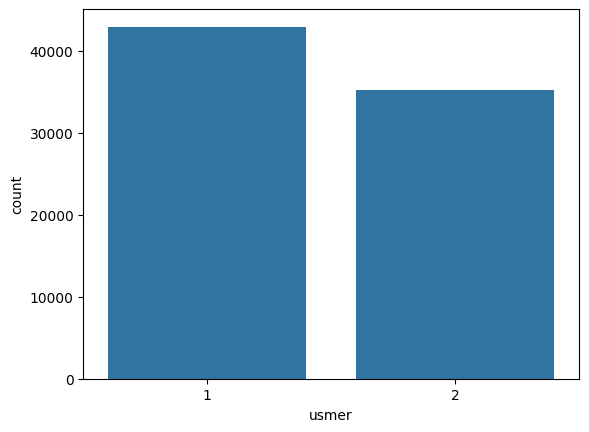

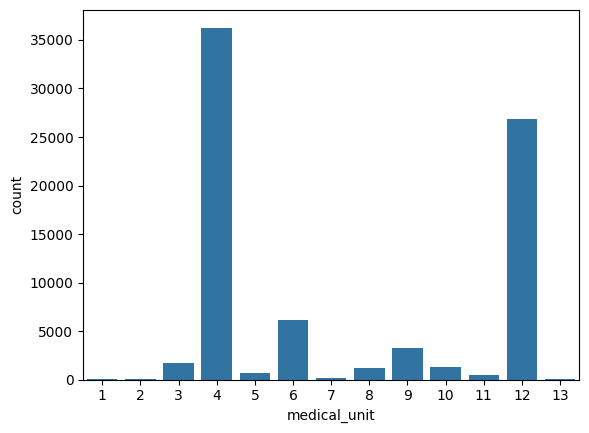

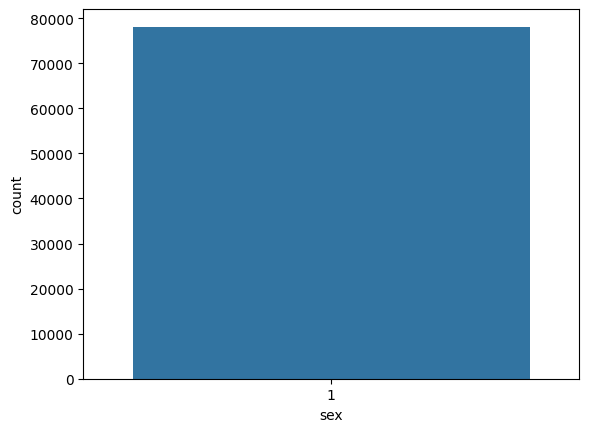

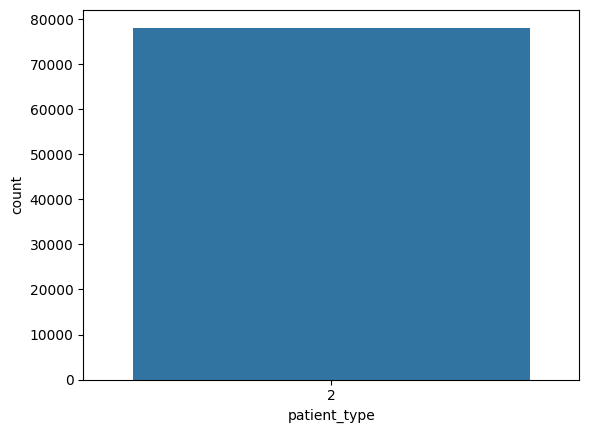

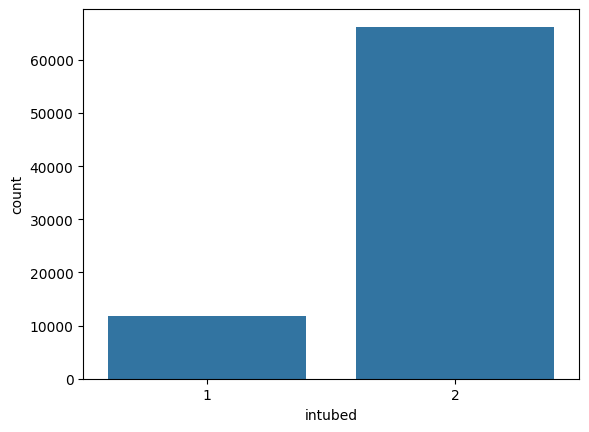

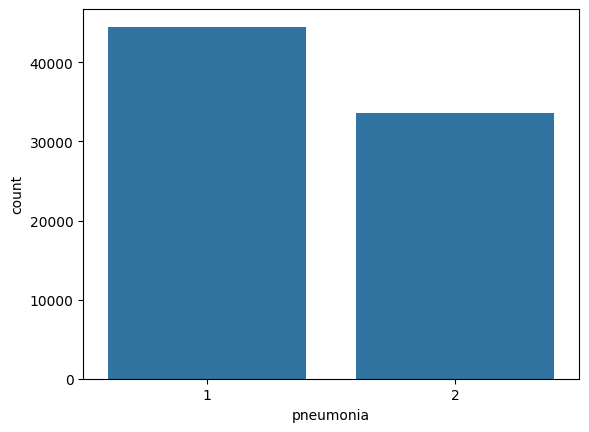

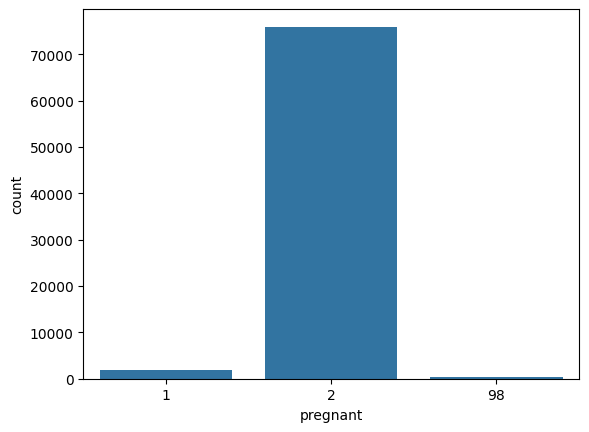

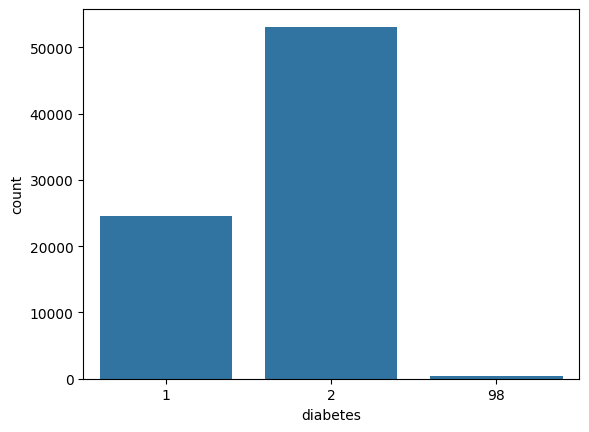

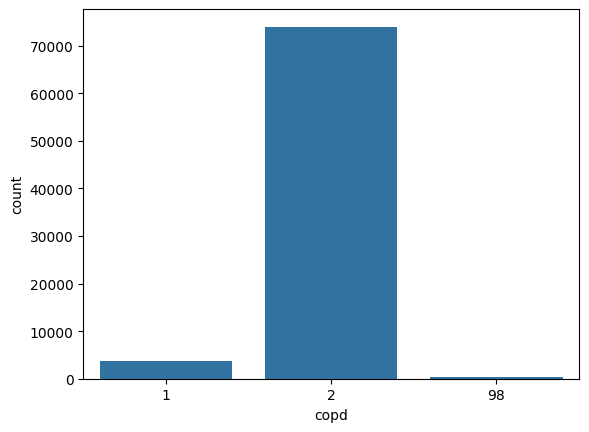

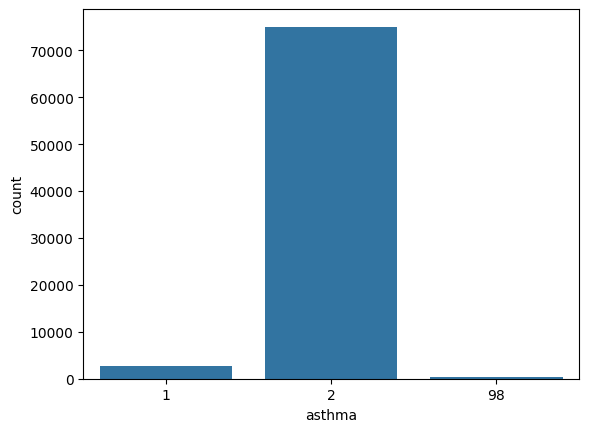

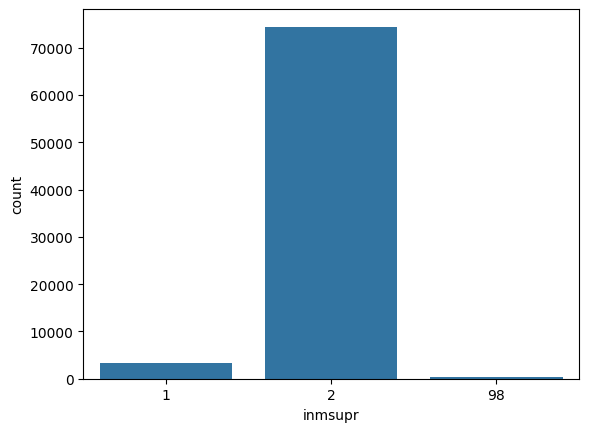

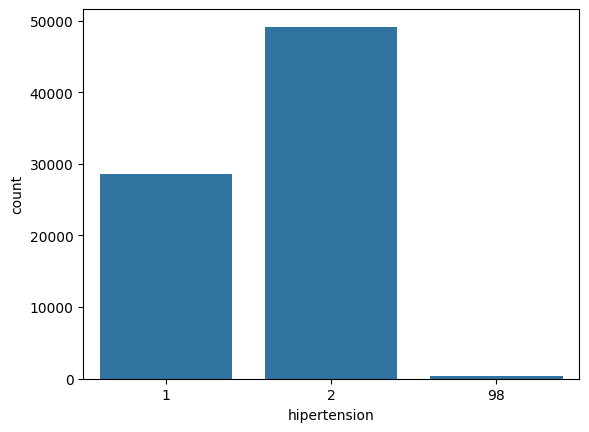

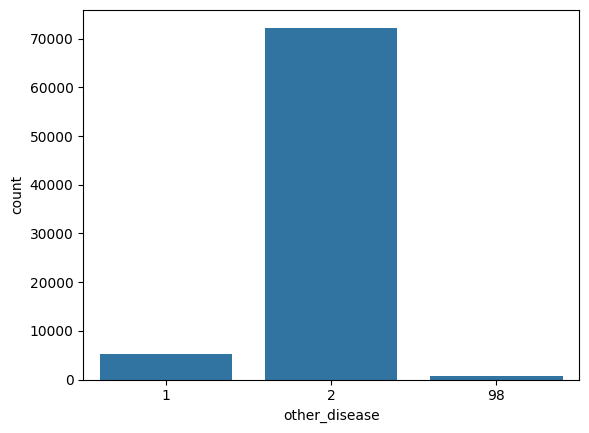

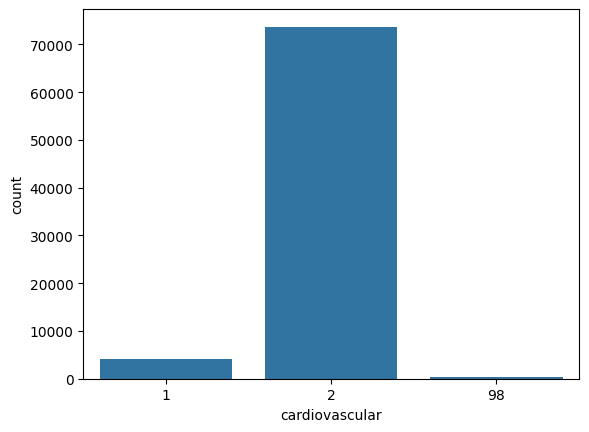

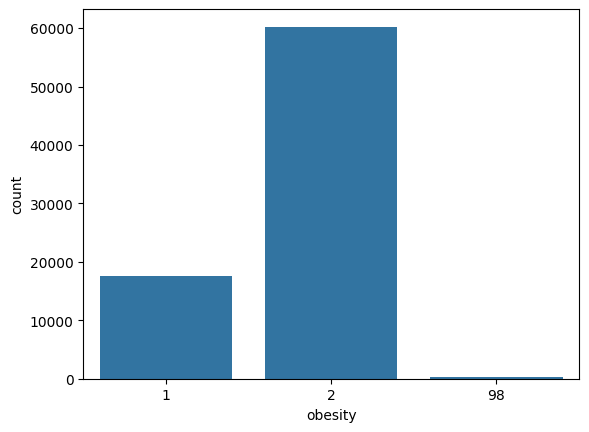

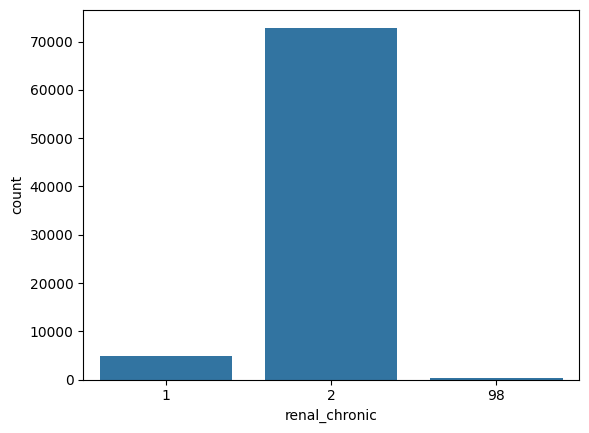

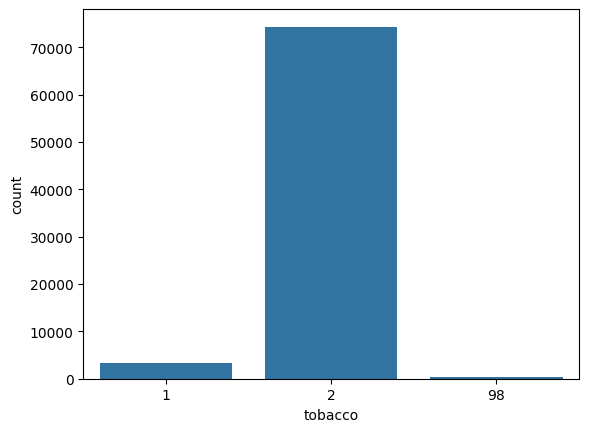

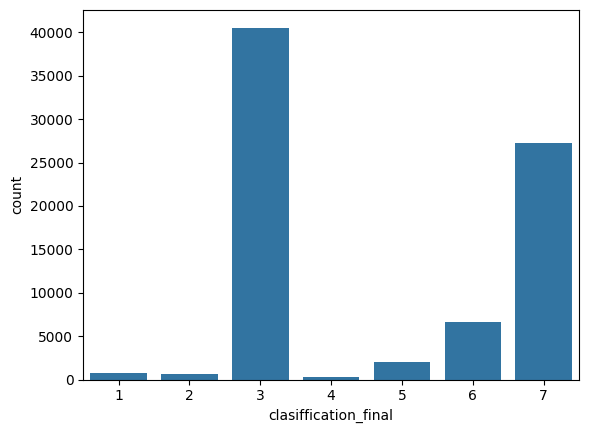

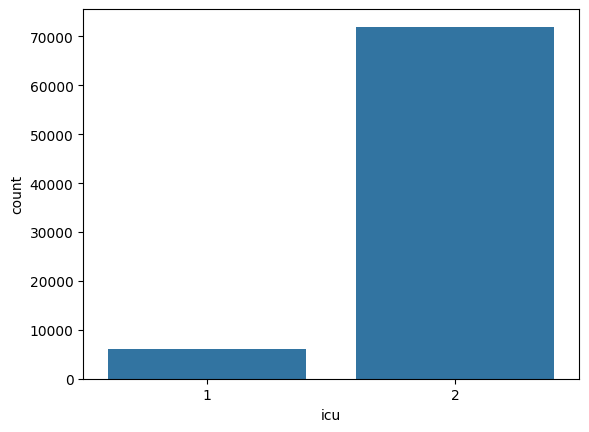

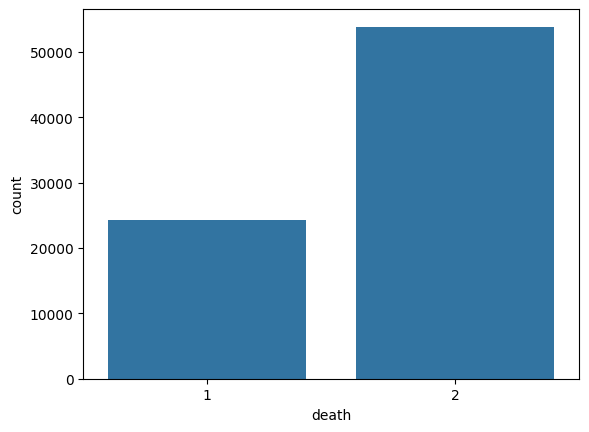

In [ ]:
for i in data.loc[:, ~data.columns.isin(["date_parsed", "age"])]:
    f = sns.countplot(x=data[i]);
    plt.show()

In [ ]:
def perc_die(col_name,has=1, die=1):
    total=data[data[col_name]==has].age.count()
    num_died=data[(data[col_name]==has) & (data['death']==die)].age.count()
    return num_died/total*100

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
percen = []
charc_cols=["inmsupr", "pregnant", "asthma","hipertension", "obesity", "cardiovascular", "tobacco", "diabetes", "pneumonia"]
for i in charc_cols:
    p = perc_die(i)
    print("Percentage of death of patients with {} is: {}%".format(i, "%.2f"%p))
    percen.append(p)
print("Maximum percentage of death is: {}".format("%.2f"% max(percen)))

Percentage of death of patients with inmsupr is: 32.07%
Percentage of death of patients with pregnant is: 4.32%
Percentage of death of patients with asthma is: 24.65%
Percentage of death of patients with hipertension is: 41.76%
Percentage of death of patients with obesity is: 35.59%
Percentage of death of patients with cardiovascular is: 38.38%
Percentage of death of patients with tobacco is: 29.51%
Percentage of death of patients with diabetes is: 41.90%
Percentage of death of patients with pneumonia is: 39.41%
Maximum percentage of death is: 41.90


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
import plotly.express as px

In [ ]:
px.bar(x=charc_cols, y=percen, text_auto=".2s", title="Percentage of death for each factor(reflect effect of each on death):")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# 4. Perform content based filtering using shopping website myntra dataset

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Load the dataset (make sure to adjust the file path)
data = pd.read_csv('/content/myntra_products_catalog.csv')
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White


In [ ]:
features = data['Description'].fillna('')  # Fill NaNs with empty string to avoid errors

#Feature extraction
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(features)
print(tfidf_matrix.shape)

#Similarity score
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

def get_recommendations(product_index, cosine_sim=cosine_sim):
    sim_scores = list(enumerate(cosine_sim[product_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_sim_scores = sim_scores[1:11]  # Get the top 10 items, excluding itself
    product_indices = [i[0] for i in top_sim_scores]
    return data['ProductName'].iloc[product_indices]

# Test the system with a product index, for example, the first product
print(get_recommendations(0))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(12491, 8418)
273    DKNY Unisex Black & Grey Printed Cabin Trolley...
497    DKNY Unisex Black & Grey Printed Large Trolley...
853    DKNY Unisex Gold-Toned & White Striped Medium ...
123    DKNY Unisex Gold & White Printed Cabin Trolley...
141    DKNY Unisex Gold & White Printed Large Trolley...
478                 DKNY Unisex Black Medium Trolley Bag
504                DKNY Unisex Silver Medium Trolley Bag
382                 DKNY Unisex Black Medium Trolley Bag
389                DKNY Unisex Purple Medium Trolley Bag
178                DKNY Unisex Silver Medium Trolley Bag
Name: ProductName, dtype: object


# 5. Perform collaborative filtering on amazon dataset


In [ ]:
!pip install scikit-surprise

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split

# Load your dataset
data = pd.read_csv('/content/amazon.csv')


# Drop rows with missing values in these critical columns
data.dropna(subset=['user_id', 'product_id', 'rating'], inplace=True)


data['rating'] = data['rating'].str.replace('|', '', regex=False)
data['rating'] = pd.to_numeric(data['rating'].replace('|', None), errors='coerce').dropna()
data['rating'] = data['rating'].astype(float)

# Prepare the data for Surprise
reader = Reader(rating_scale=(1, 5))  # Adjust the rating scale if necessary
data = Dataset.load_from_df(data[['user_id', 'product_id', 'rating']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

# Create and train the SVD model
model = SVD()
model.fit(trainset)

# Test the model and collect predictions
predictions = model.test(testset)

# Organize predictions into a DataFrame
predicted_ratings = pd.DataFrame([(pred.uid, pred.iid, pred.r_ui, pred.est) for pred in predictions],
                                 columns=['User ID', 'Product ID', 'Actual Rating', 'Estimated Rating'])
predicted_ratings['Error'] = abs(predicted_ratings['Actual Rating'] - predicted_ratings['Estimated Rating'])

# Display the results
predicted_ratings.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,User ID,Product ID,Actual Rating,Estimated Rating,Error
0,"AHC7U7MTAN2Y2T6X2G43SWSQHETQ,AFN6JOIM4WB7CBNNA...",B00B7GKXMG,4.1,4.090444,0.009556
1,"AHKMDJ4Y4EBQDNX6WV4U6DCESQXQ,AEH2EQBAQVCXDUXSZ...",B0B5F3YZY4,4.0,4.090444,0.090444
2,"AH4OX4YZN7FYK5EGLIGSPL7V5GEA,AF3P7GAMRCSCUNVGI...",B08D77XZX5,3.9,4.090444,0.190444
3,"AG7L3FBDA2KLNZOZWS2XF7Y2GGRQ,AH6VYUL52LC2OCCRB...",B09M869Z5V,4.2,4.090444,0.109556
4,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...",B08L12N5H1,NaN,4.090444,NaN
5,"AF2RABP57DKRSINAD3R2DKITOV7Q,AEGE3H7UIM7FCTYQK...",B00LY12TH6,4.5,4.090444,0.409556
6,"AGX7Q447BYAOPUPJVHUBUYDFSEGA,AHVLQMNM6YIXWPWKQ...",B083P71WKK,4.3,4.090444,0.209556
7,"AHS7IMVVE56BINTOOQEC3ZDFCCRA,AEZD2VA4YOHTVUTQD...",B078HG2ZPS,3.9,4.090444,0.190444
8,"AFMBNWKA4H7GP6PAHPYY25A6Z4HQ,AGMBVEO4J5JYGUM6X...",B07L8KNP5F,3.8,4.090444,0.290444
9,"AGQPAKYDQNK56M5SRVNDN4XOEDKQ,AGA3QPDGKGEZFTLXE...",B00NW4UWN6,3.8,4.090444,0.290444


# 6. Perform sentiment and topic modeling analysis on zomato dataset



In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/zomato_reviews.csv')
data.head()

,Unnamed: 0,rating,review
0,0,5,nice
1,1,5,"best biryani , so supportive staff of outlet ,..."
2,2,4,delivery boy was very decent and supportive.👌👍
3,3,1,"worst biryani i have tasted in my life, half o..."
4,4,5,all food is good and tasty . will order again ...


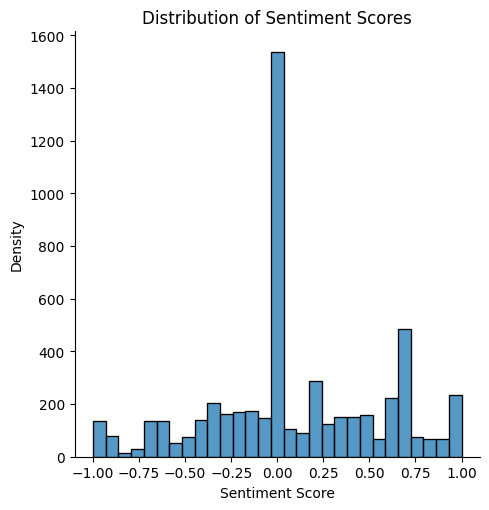

,Unnamed: 0,rating,review,sentiment
0,0,5,nice,0.600000
1,1,5,"best biryani , so supportive staff of outlet ,...",0.616667
2,2,4,delivery boy was very decent and supportive.👌👍,0.216667
3,3,1,"worst biryani i have tasted in my life, half o...",-0.583333
4,4,5,all food is good and tasty . will order again ...,0.600000


In [ ]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Function to get sentiment
def get_sentiment(text):
    # Creating a TextBlob object
    blob = TextBlob(str(text))
    return blob.sentiment.polarity

# Apply the function to reviews
data['sentiment'] = data['review'].apply(get_sentiment)

sns.displot(data['sentiment'])
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.show()
data.head()

In [ ]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

# Tokenizer to remove unwanted elements from data like symbols and numbers
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(document):
    # Tokenize
    if pd.isna(document):
        return []
    document = str(document)
    tokens = tokenizer.tokenize(document.lower())
    # Remove stopwords
    filtered_tokens = [token for token in tokens if token not in stop_words and len(token) > 3]
    return filtered_tokens

# Preprocess the reviews
processed_data = list(data['review'].map(preprocess_text))

# Create a dictionary
dictionary = corpora.Dictionary(processed_data)
# Create document-term matrix
corpus = [dictionary.doc2bow(text) for text in processed_data]

# Build the LDA model
ldamodel = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=5)
for topic in topics:
    print(topic)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(0, '0.042*"delivery" + 0.041*"order" + 0.030*"quantity" + 0.027*"less" + 0.025*"horrible"')
(1, '0.129*"good" + 0.041*"taste" + 0.037*"pizza" + 0.032*"quality" + 0.029*"food"')
(2, '0.040*"order" + 0.019*"sandwich" + 0.018*"chicken" + 0.015*"disappointed" + 0.014*"dosa"')
(3, '0.041*"food" + 0.036*"nice" + 0.033*"best" + 0.024*"taste" + 0.020*"great"')
(4, '0.040*"food" + 0.027*"worst" + 0.022*"like" + 0.021*"cold" + 0.016*"restaurant"')


In [ ]:
!!pip install pyLDAvis

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Prepare the visualization
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(ldamodel, corpus, dictionary)

# Display the visualization
pyLDAvis.display(vis)

# 7. Perform minimum five data cleaning and processing operations on popular restaurant dataset


In [ ]:
import pandas as pd

# Load the dataset from the provided URL
url = "https://raw.githubusercontent.com/shr1911/Tourism-Recommendation/master/Tourism/data/restaurant.csv"
data = pd.read_csv(url)

# Strip leading and trailing spaces
data.columns = data.columns.str.strip()

# Display the first few rows to understand its structure
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,name,latitude,longitude,address,area,city,cost,rating,homedelivery,smoking,alcohol,wifi,valetparking,rooftop
0,0,Razzberry Rhinoceros,19.102989,72.825519,"JuhuHotel, 39/2, Juhu Tara, Juhu, Mumbai",Juhu,Mumbai,2500,3.5,no,yes,yes,yes,yes,no
1,1,JLWA,19.060339,72.836166,"Linking Road, Bandra West3rd Floor, VN Sphere ...","Linking Road, Bandra West",Mumbai,1600,4.5,no,yes,yes,no,yes,no
2,2,Tamasha,19.005862,72.827454,"Ground Floor, Victoria House, E.B Marg,Lower P...",Lower Parel,Mumbai,1800,4.1,no,yes,yes,no,yes,no
3,3,Joey's Pizza,19.178182,72.834692,"Shop 1, Plot D, Samruddhi Complex, Chincholi B...",Malad West,Mumbai,800,4.6,yes,no,no,no,no,no
4,4,HITCHKI,19.119872,72.907044,"5, Transocean, Hiranandani Business Park, Lake...",Powai,Mumbai,1200,4.0,no,yes,yes,yes,yes,no


In [ ]:
# Check for missing values
print(data.isnull().sum())

id              0
name            0
latitude        0
longitude       0
address         0
area            0
city            0
cost            0
rating          0
homedelivery    0
smoking         0
alcohol         0
wifi            0
valetparking    0
rooftop         0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Example: Create a new feature based on the rating
data['popularity'] = data['rating'].apply(lambda x: 'High' if x > 4 else 'Low')

data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,name,latitude,longitude,address,area,city,cost,rating,homedelivery,smoking,alcohol,wifi,valetparking,rooftop,popularity
0,0,Razzberry Rhinoceros,19.102989,72.825519,"JuhuHotel, 39/2, Juhu Tara, Juhu, Mumbai",Juhu,Mumbai,2500,3.5,no,yes,yes,yes,yes,no,Low
1,1,JLWA,19.060339,72.836166,"Linking Road, Bandra West3rd Floor, VN Sphere ...","Linking Road, Bandra West",Mumbai,1600,4.5,no,yes,yes,no,yes,no,High
2,2,Tamasha,19.005862,72.827454,"Ground Floor, Victoria House, E.B Marg,Lower P...",Lower Parel,Mumbai,1800,4.1,no,yes,yes,no,yes,no,High
3,3,Joey's Pizza,19.178182,72.834692,"Shop 1, Plot D, Samruddhi Complex, Chincholi B...",Malad West,Mumbai,800,4.6,yes,no,no,no,no,no,High
4,4,HITCHKI,19.119872,72.907044,"5, Transocean, Hiranandani Business Park, Lake...",Powai,Mumbai,1200,4.0,no,yes,yes,yes,yes,no,Low


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler
scaler = MinMaxScaler()

# Assuming 'rating' is a numerical column that we want to normalize
data['rating_normalized'] = scaler.fit_transform(data[['rating']])

# Check the transformation
print(data[['rating', 'rating_normalized']].head())

   rating  rating_normalized
0     3.5           0.481481
1     4.5           0.851852
2     4.1           0.703704
3     4.6           0.888889
4     4.0           0.666667


In [ ]:
# Convert categorical variable 'status' into integer codes
data['city_code'] = data['city'].astype('category').cat.codes

# Extract unique city and their corresponding codes
unique_cities = data[['city', 'city_code']].drop_duplicates().sort_values(by='city')

# Print the unique cities and their codes
print(unique_cities)

                        city  city_code
24      Andheri Airport Road          0
52              Andheri East          1
62        Balraj Sahani Marg          2
63                    Colaba          3
25                      Juhu          4
60                      Khar          5
97                     Marol          6
22                    Mumbai          7
65   Mumbai Veera Desai Area          8
0                     Mumbai          9


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale features like 'cost' using Standard Scaler
scaler = StandardScaler()
data['cost_scaled'] = scaler.fit_transform(data[['cost']])

# Check the scaled feature
print(data[['cost', 'cost_scaled']].head())

   cost  cost_scaled
0  2500     1.316903
1  1600     0.360741
2  1800     0.573221
3   800    -0.489181
4  1200    -0.064220


# 8. Perform Sentiment analysis and trend analysis on airline dataset


In [ ]:
import pandas as pd
from textblob import TextBlob

# Load the dataset
data = pd.read_csv('/content/Airline_review.csv')

# Preview the data
data.head()

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,Nov-19,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,Jun-19,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,Jun-19,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,Sep-19,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,Sep-19,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


In [ ]:
# Function to calculate sentiment
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to your reviews column
data['sentiment'] = data['Review'].apply(calculate_sentiment)

# View the sentiment scores
print(data[['Review', 'sentiment']].head())

                                              Review  sentiment
0    Moroni to Moheli. Turned out to be a pretty ...   0.302222
1   Moroni to Anjouan. It is a very small airline...  -0.077083
2    Anjouan to Dzaoudzi. A very small airline an...   0.070833
3    Please do a favor yourself and do not fly wi...  -0.206250
4   Do not book a flight with this airline! My fr...   0.175000


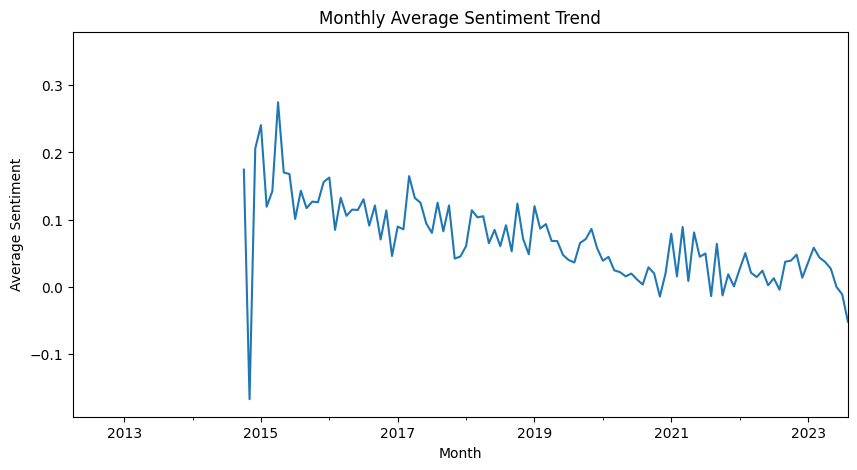

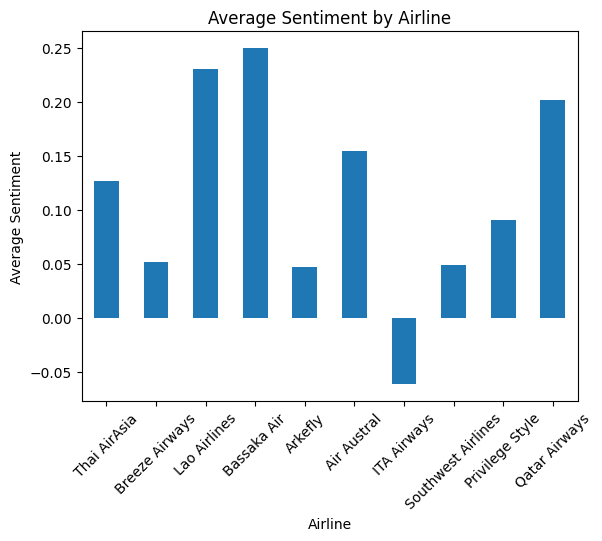

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Assume there's a 'date' column in your dataset; convert it to datetime format
data['Date Flown'] = pd.to_datetime(data['Date Flown'], format='%b-%y', errors='coerce')

# Set date as index
data.set_index('Date Flown', inplace=True)

# Resample data by month and calculate average sentiment
monthly_sentiment = data['sentiment'].resample('M').mean()

plt.figure(figsize=(10, 5))
monthly_sentiment.plot(title='Monthly Average Sentiment Trend')
plt.xlabel('Month')
plt.ylabel('Average Sentiment')
plt.show()
print()

# Airline-specific sentiment trend
airline_sentiment = data.groupby('Airline Name')['sentiment'].mean().sort_values()

airlines = airline_sentiment.sample(n=10, random_state=np.random.RandomState())

# Plotting
airlines.plot(kind='bar', title='Average Sentiment by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.show()

# 9. Perform exploratory data analysis on netlix or any movie website dataset to visualize pie and bar chart

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                 Film    Genre            Lead Studio  \
0          Zack and Miri Make a Porno  Romance  The Weinstein Company   
1                     Youth in Revolt   Comedy  The Weinstein Company   
2  You Will Meet a Tall Dark Stranger   Comedy            Independent   
3                        When in Rome   Comedy                 Disney   
4               What Happens in Vegas   Comedy                    Fox   

   Audience score %  Profitability  Rotten Tomatoes % Worldwide Gross  Year  
0                70       1.747542                 64         $41.94   2008  
1                52       1.090000                 68         $19.62   2010  
2                35       1.211818                 43         $26.66   2010  
3                44       0.000000                 15         $43.04   2010  
4                72       6.267647                 28        $219.37   2008  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 c

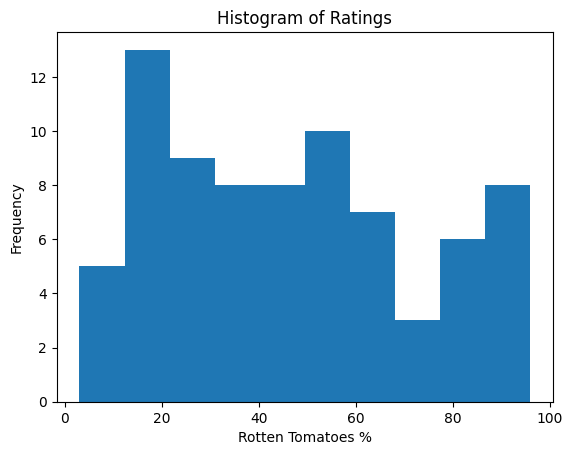

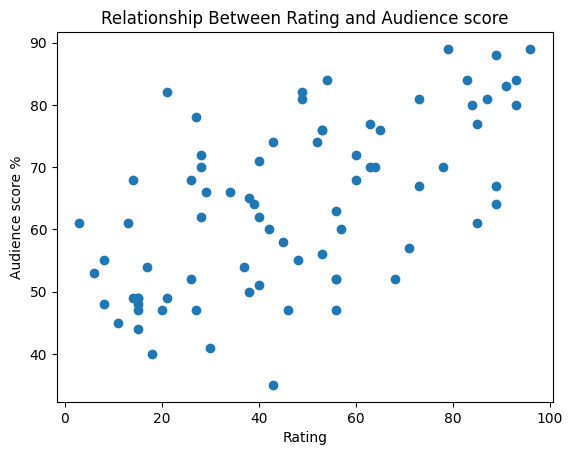

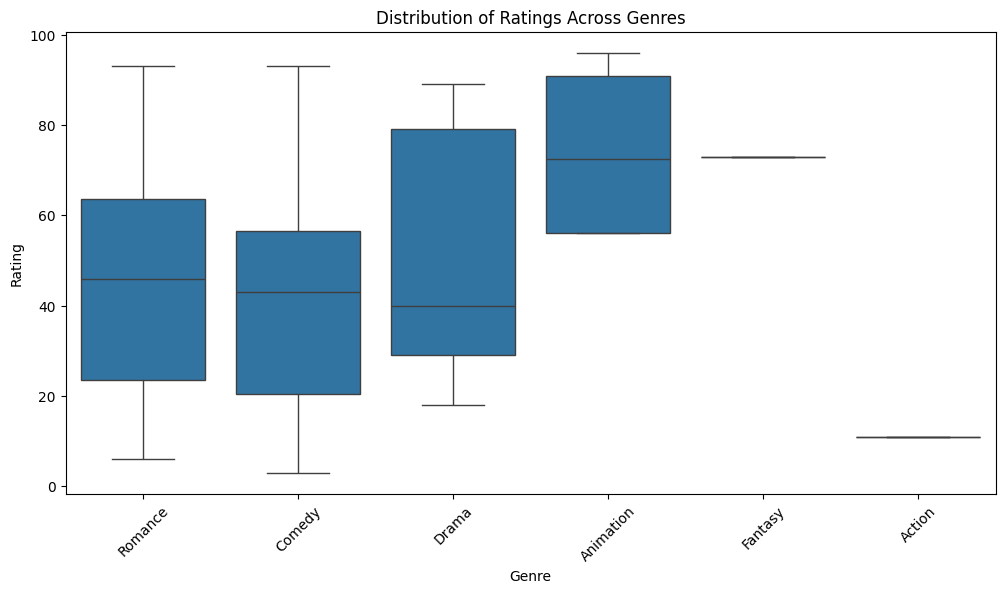

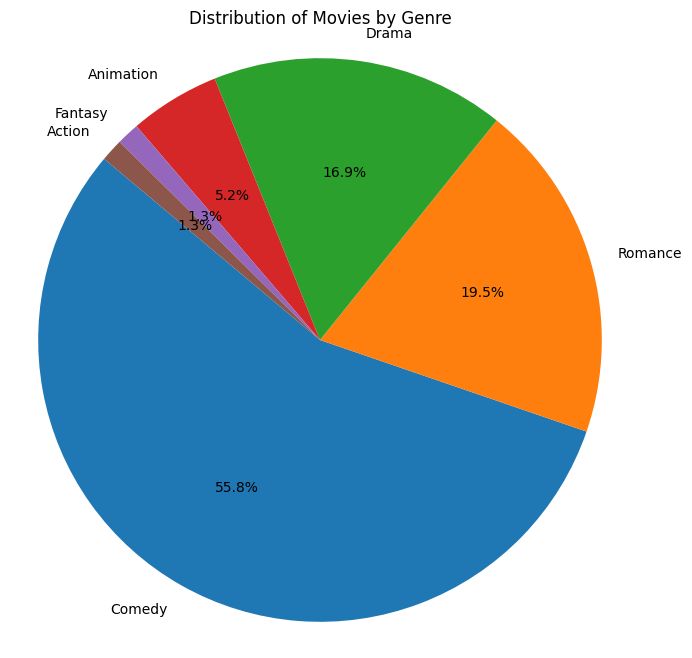

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://gist.githubusercontent.com/tiangechen/b68782efa49a16edaf07dc2cdaa855ea/raw/0c794a9717f18b094eabab2cd6a6b9a226903577/movies.csv"
movies = pd.read_csv(url)

# Explore the data
print(movies.head())
print(movies.info())

# Check for missing values
print(movies.isnull().sum())

movies['Genre'] = movies['Genre'].replace(('Comdy','comedy'),'Comedy')
movies['Genre'] = movies['Genre'].replace(('Romence','romance'),'Romance')

# Analyze the distribution of movie ratings
movies['Rotten Tomatoes %'].plot(kind='hist', title='Histogram of Ratings')
plt.xlabel('Rotten Tomatoes %')
plt.show()



# Analyze the relationship between rating and Audience score
plt.scatter(movies['Rotten Tomatoes %'], movies['Audience score %'])
plt.xlabel('Rating')
plt.ylabel('Audience score %')
plt.title('Relationship Between Rating and Audience score')
plt.show()


# Plotting the distribution of ratings for each genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Rotten Tomatoes %', data=movies)
plt.title('Distribution of Ratings Across Genres')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45)  # Rotate genre names for better visibility
plt.show()

# By using Pie chart

plt.figure(figsize=(8, 8))
Genre_counts = movies['Genre'].value_counts()
plt.pie(Genre_counts, labels=Genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Movies by Genre')
plt.axis('equal')
plt.show()